In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:03:14'}]


### Load the data

In [3]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

stock_data = yf.download(stock, start, end)

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[*********************100%%**********************]  1 of 1 completed

[{'15-08-2024 15:03:21'}]


In [6]:
stock_data.reset_index(inplace=True)
stock_data


,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,1,1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2,2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,3,3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,4,4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...,...,...
3170,3170,3170,2024-08-09,161.645004,165.520004,160.929993,165.389999,165.389999,13549200
3171,3171,3171,2024-08-12,165.994995,166.699997,163.550003,163.949997,163.949997,12435000
3172,3172,3172,2024-08-13,165.184998,166.539993,164.770004,165.929993,165.929993,12717600
3173,3173,3173,2024-08-14,164.210007,164.960007,159.529999,162.029999,162.029999,22472600


In [7]:
print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:03:59'}]


In [8]:
ma_100_days = stock_data.Close.rolling(100).mean()
print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:04:03'}]


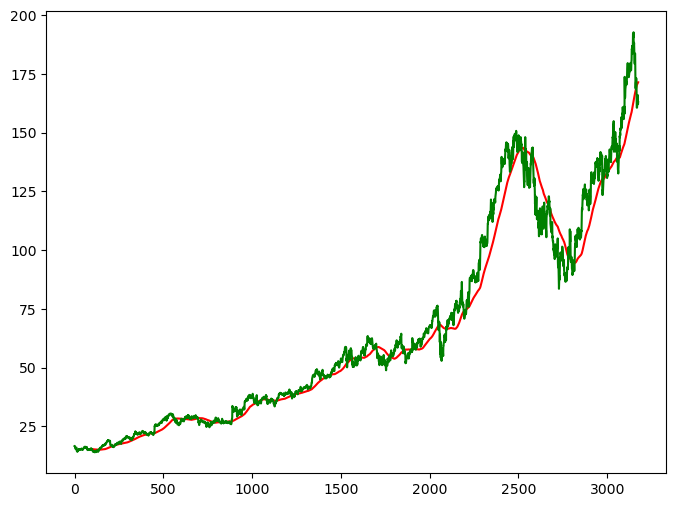

[{'15-08-2024 15:04:08'}]


In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(stock_data.Close, 'g')
plt.show()
print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

In [12]:
ma_200_days = stock_data.Close.rolling(200).mean()

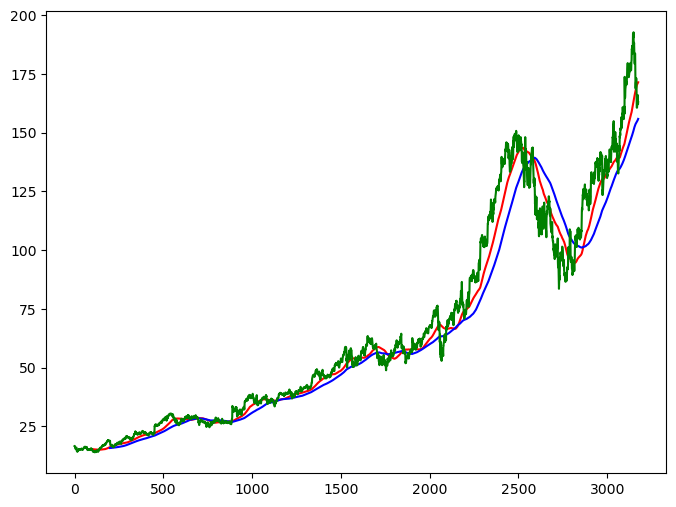

[{'15-08-2024 15:04:26'}]


In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(stock_data.Close,'g')
plt.show()

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

In [14]:
stock_data.dropna(inplace=True)

In [15]:
data_train = pd.DataFrame(stock_data.Close[0: int(len(stock_data)*0.80)])
data_test = pd.DataFrame(stock_data.Close[int(len(stock_data)*0.80): len(stock_data)])

In [16]:
data_train.shape[0]

2540

In [17]:
data_test.shape[0]

635

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:04:51'}]


In [19]:
data_train_scale = scaler.fit_transform(data_train)
print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:04:56'}]


In [20]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:05:02'}]


In [21]:
x, y = np.array(x), np.array(y)
print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:05:06'}]


### Model Creation

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:05:11'}]


In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:05:16'}]


C:\Users\shels\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:05:21'}]


In [25]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - loss: 0.0483
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0053
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0045
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0033
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0041
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0036
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 0.0032
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0033
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0028
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0039
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0027
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0022
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0029
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0023
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [26]:
model.summary()

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

[{'15-08-2024 15:23:17'}]


In [27]:
pas_100_days = data_train.tail(100)

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:21'}]


In [28]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:22'}]


In [29]:
data_test_scale  =  scaler.fit_transform(data_test)

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:23'}]


In [30]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:23'}]


In [31]:
y_predict = model.predict(x)

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
[{'15-08-2024 15:23:27'}]


In [32]:
scale =1/scaler.scale_

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:27'}]


In [33]:
y_predict = y_predict*scale

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:27'}]


In [34]:
y = y*scale

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:28'}]


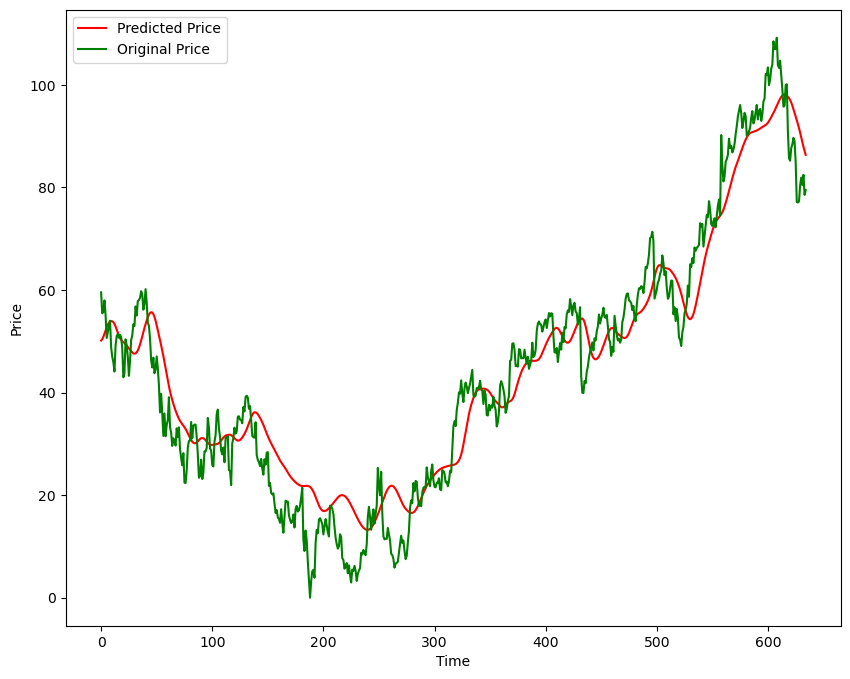

[{'15-08-2024 15:23:29'}]


In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

### Model Saved

In [36]:
model.save('DP_Bdat_Stock_Predictions_Model.keras')

print([{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] )

[{'15-08-2024 15:23:32'}]
